In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# import pandas as pd

import warnings

warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')



print(mnist)


{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


/home/lucas/Applications/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/lucas/Applications/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


# Subsets

In [3]:
data, target = mnist['data'], mnist['target']


print(data.shape, target.shape)



(70000, 784) (70000,)


## Scaling

In [4]:
print(data[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

## Image Test

3.0


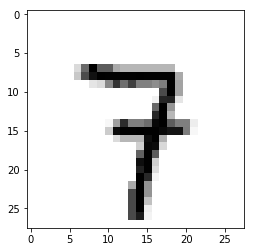

In [5]:
def print_picture(picture_data):
    picture_data = picture_data.reshape(28, 28)
    
    plt.imshow(picture_data, cmap=matplotlib.cm.binary, interpolation='nearest')

print_picture(data[45010])
print(target[20000])

# Dataset Split

In [6]:
# Training Data

train_data = data[:60000] 
train_target = target[:60000]

# Testing Data

test_data = data[60000:]
test_target = target[60000:]

# Shuffle train_data
random_index = np.random.permutation(60000)

train_data = train_data[random_index]
train_target = train_target[random_index]

print("Training Data: ", train_data.shape, "; Test Data: ", test_data.shape)
print("Training Target: ", train_target.shape, "; Test Target: ", test_target.shape)

Training Data:  (60000, 784) ; Test Data:  (10000, 784)
Training Target:  (60000,) ; Test Target:  (10000,)


In [7]:
from sklearn.preprocessing import StandardScaler


# scaler = StandardScaler()
# 
# test_data_scaled = scaler.fit_transform(test_data.astype(np.float64))
# train_data_scaled = scaler.fit_transform(train_data.astype(np.float64))




# Binary Detector
## Dataset Split

In [8]:
train_target_5 = train_target == 5
test_target_5 = test_target == 5

## Classifier

In [9]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(random_state=20, max_iter=5)
classifier.fit(train_data, train_target_5)

# print(train_data[:200])
print(train_target_5[:200])

[False False False False  True False False False False False False False
  True False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False  True False False False False
  True False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False  True False
 False False False False False False False False Fa

## Diagnostics

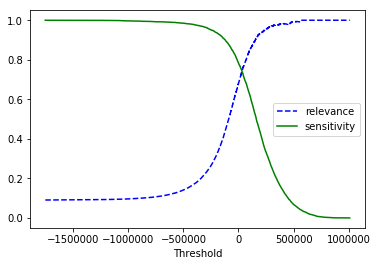

In [10]:
# Imports
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_recall_curve

def diagnose(model, data, target):
    cross_val_score = cross_val_predict(model, data, target, cv=3, method='decision_function')
#     score = cross_val_predict(model, data, target, cv=3, method='decision_function')
#     f1 = f1_score(target, cross_val_score)
    precisions, recalls, thresholds = precision_recall_curve(target, cross_val_score)
#     print("F1 Score: ", f1)
    plt.plot(thresholds, precisions[:-1], "b--", label="relevance")
    plt.plot(thresholds, recalls[:-1], "g-", label="sensitivity")
    plt.xlabel('Threshold')
    plt.legend()
    plt.show()


diagnose(classifier, train_data, train_target_5)

# Mutli Category Classifier

In [11]:
classifier.fit(train_data, train_target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=20, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
classifier.predict(test_data[4000].reshape(1,-1))
print(test_target[4000])

3.0


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

score = cross_val_score(classifier, test_data, test_target, cv=3, scoring='accuracy')
pr = cross_val_predict(classifier, test_data_scaled, test_target, cv=3)


con_mtrx = confusion_matrix(pr, test_target)

plt.matshow(con_mtrx, cmap=plt.cm.gray)

NameError: name 'test_data_scaled' is not defined

In [14]:
print(con_mtrx)

NameError: name 'con_mtrx' is not defined

array([3.])

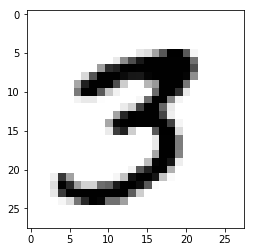

In [15]:
    x = np.random.choice(6000, 1)
    plt.imshow(test_data[x].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')
    classifier.predict(test_data[x].reshape(1,-1))

In [16]:
system("jupyter" "notebook" "list")

['Currently running servers:', 'http://localhost:8888/?token=x :: /home/lucas']

In [17]:
# Bild Rauschen Entfernen

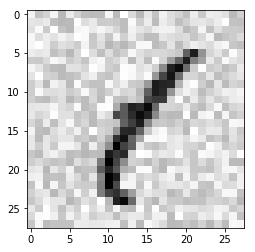

In [18]:
from numpy.random import randint

# Generating Noise Data (
noise = randint(0, 100, (len(train_data), 784))

# Applying Noise Data to Data-Set
train_data_noise = train_data + noise
noise = randint(0, 100, (len(test_data), 784))
test_data_noise = test_data + noise

train_target_noise = train_data
test_target_noise = test_data

print_picture(test_data_noise[2000].reshape(1,-1))
# print_picture(test_target_noise[2000].reshape(1,-1))

In [19]:
# Imports
from sklearn.neighbors import KNeighborsClassifier

kn_class = KNeighborsClassifier()

# Training
kn_class.fit(train_data_noise, train_target_noise)

# Test
kn_class.predict(test_data_noise)



print("Done")



Done


In [24]:
kn_pred = cross_val_predict(kn_class, test_data_noise, test_target_noise, cv=3)
kn_con_mtrx = confusion_matrix(kn_pred, test_target_noise)
# plt.matshow(con_mtrx, cmap=plt.cm.gray)
print(kn_con_mtrx)

ValueError: multiclass-multioutput is not supported

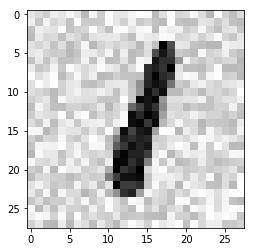

In [25]:
# print_picture(kn_class.predict(test_data_noise[1743].reshape(1, -1)))
print_picture(test_data_noise[1743].reshape(-1,1))

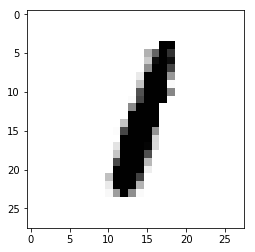

In [26]:
print_picture(kn_class.predict(test_data_noise[1743].reshape(1, -1)))